In [2]:
import numpy
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [4]:
dataframe = pandas.read_csv(r'C:\Users\reemn\Downloads\adult.csv\adult.csv')

dataframe = dataframe.replace({'?': numpy.nan}).dropna()

In [5]:
# Assign names to Columns
dataframe.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# Encode Data
dataframe.workclass.replace(('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'),(1,2,3,4,5,6,7,8), inplace=True)
dataframe.education.replace(('Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), inplace=True)
dataframe.marital_status.replace(('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'),(1,2,3,4,5,6,7), inplace=True)
dataframe.occupation.replace(('Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14), inplace=True)
dataframe.relationship.replace(('Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'),(1,2,3,4,5,6), inplace=True)
dataframe.race.replace(('White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'),(1,2,3,4,5), inplace=True)
dataframe.sex.replace(('Female', 'Male'),(1,2), inplace=True)
dataframe.native_country.replace(('United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace=True)
dataframe.income.replace(('<=50K', '>50K'),(0,1), inplace=True)

In [6]:
print("Head:", dataframe.head())

Head:    age  workclass  fnlwgt  education  education_num  marital_status  \
1   82          1  132870          4              9               5   
3   54          1  140359          9              4               2   
4   41          1  264663          2             10               4   
5   34          1  216864          4              9               2   
6   38          1  150601         13              6               4   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
1           5             4     1    1             0          4356   
3           8             6     1    1             0          3900   
4           6             2     1    1             0          3900   
5           3             6     1    1             0          3770   
6           9             6     1    2             0          3770   

   hours_per_week  native_country  income  
1              18               1       0  
3              40               1       0  
4             

In [7]:
print("Statistical Description:", dataframe.describe())

Statistical Description:                 age     workclass        fnlwgt     education  education_num  \
count  30162.000000  30162.000000  3.016200e+04  30162.000000   30162.000000   
mean      38.437902      1.736788  1.897938e+05      4.372820      10.121312   
std       13.134665      1.461908  1.056530e+05      3.429379       2.549995   
min       17.000000      1.000000  1.376900e+04      1.000000       1.000000   
25%       28.000000      1.000000  1.176272e+05      2.000000       9.000000   
50%       37.000000      1.000000  1.784250e+05      4.000000      10.000000   
75%       47.000000      2.000000  2.376285e+05      5.000000      13.000000   
max       90.000000      7.000000  1.484705e+06     16.000000      16.000000   

       marital_status    occupation  relationship          race           sex  \
count    30162.000000  30162.000000  30162.000000  30162.000000  30162.000000   
mean         2.053213      5.742159      3.393276      1.445196      1.675685   
std        

In [8]:
print("Shape:", dataframe.shape)

Shape: (30162, 15)


In [9]:
print("Data Types:", dataframe.dtypes)

Data Types: age               int64
workclass         int64
fnlwgt            int64
education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object


In [10]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:                      age  workclass    fnlwgt  education  education_num  \
age             1.000000   0.135486 -0.076511   0.115389       0.043526   
workclass       0.135486   1.000000 -0.026818   0.033766       0.179178   
fnlwgt         -0.076511  -0.026818  1.000000   0.021349      -0.044992   
education       0.115389   0.033766  0.021349   1.000000      -0.232986   
education_num   0.043526   0.179178 -0.044992  -0.232986       1.000000   
marital_status -0.229179  -0.054710  0.028843  -0.014321      -0.103014   
occupation      0.022717   0.128779  0.003759   0.012513      -0.039235   
relationship    0.122997   0.013467  0.015271   0.028990      -0.033293   
race           -0.023827   0.034985  0.099251   0.007865      -0.079069   
sex             0.081993  -0.005317  0.025362   0.032919       0.006157   
capital_gain    0.080154   0.013702  0.000422   0.022472       0.124416   
capital_loss    0.060165   0.022541 -0.009750   0.020413       0.079646   
hours_per_we

In [11]:
dataset = dataframe.values


X = dataset[:,0:14]
Y = dataset[:,14] 

In [12]:
# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

# scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarise selected features
print(features[0:10,:])

[7.928e+03 2.723e+02 1.423e+05 7.424e+00 2.178e+03 2.888e+03 9.492e+01
 4.313e+02 2.759e+02 1.852e+02 7.413e+07 1.256e+06 5.569e+03 1.349e+03]
[[132870      0   4356]
 [140359      0   3900]
 [264663      0   3900]
 [216864      0   3770]
 [150601      0   3770]
 [ 88638      0   3683]
 [422013      0   3683]
 [172274      0   3004]
 [164526      0   2824]
 [129177      0   2824]]


In [13]:
#Feature Selection
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)

C:\Users\reemn\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reemn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

Number of Features:  3
Selected Features:  [False False False False  True  True False False False  True False False
 False False]
Feature Ranking:  [ 8  4 12  9  1  1  5  2  3  1 11 10  6  7]


In [14]:
pca = PCA(n_components=3)
fit = pca.fit(X)

print("Explained Varience: ", fit.explained_variance_ratio_)

Explained Varience:  [9.951e-01 4.890e-03 1.456e-05]


In [15]:
model = ExtraTreesClassifier()
model.fit(X, Y)
print("Feature Importance: ", model.feature_importances_)

Feature Importance:  [0.162 0.039 0.166 0.033 0.09  0.091 0.08  0.068 0.014 0.029 0.087 0.029
 0.094 0.017]


(array([22654.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

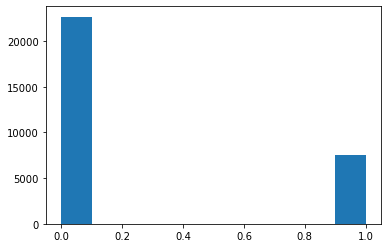

In [16]:
plt.hist((dataframe.income))

[Text(0, 0, 'age'),
 Text(0, 1, 'workclass'),
 Text(0, 2, 'fnlwgt'),
 Text(0, 3, 'education'),
 Text(0, 4, 'education_num'),
 Text(0, 5, 'marital_status'),
 Text(0, 6, 'occupation'),
 Text(0, 7, 'relationship'),
 Text(0, 8, 'race'),
 Text(0, 9, 'sex'),
 Text(0, 10, 'capital_gain'),
 Text(0, 11, 'capital_loss'),
 Text(0, 12, 'hours_per_week'),
 Text(0, 13, 'native_country'),
 Text(0, 14, 'income')]

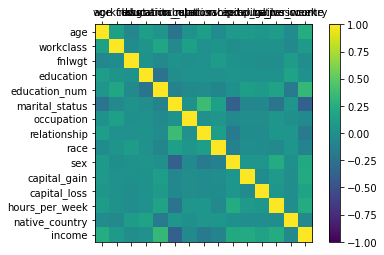

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

In [18]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)
print("X_Train: ", X_Train.shape)
print("X_Test: ", X_Test.shape)
print("Y_Train: ", Y_Train.shape)
print("Y_Test: ", Y_Test.shape)

X_Train:  (21113, 14)
X_Test:  (9049, 14)
Y_Train:  (21113,)
Y_Test:  (9049,)


In [19]:
num_instances = len(X)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('L_SVM', LinearSVC()))
models.append(('SGDC', SGDClassifier()))

# Evaluations
results = []
names = []

for name, model in models:
    # Fit the model
    model.fit(X_Train, Y_Train)
    
    predictions = model.predict(X_Test)
    
    # Evaluate the model
    score = accuracy_score(Y_Test, predictions)
    mse = mean_squared_error(predictions, Y_Test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mse)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mse)
    print(msg)

LR: 0.794010 (0.205990)
LDA: 0.827384 (0.172616)
KNN: 0.767599 (0.232401)
CART: 0.799094 (0.200906)
NB: 0.792905 (0.207095)
SVM: 0.790364 (0.209636)


C:\Users\reemn\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


L_SVM: 0.782186 (0.217814)
SGDC: 0.779755 (0.220245)


In [20]:
# create model
model = Sequential()
model.add(Dense(28, input_dim=14, activation='relu', kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_constraint=maxnorm(3), kernel_initializer="uniform"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="uniform"))
model.add(Dense(1, activation='sigmoid', kernel_initializer="uniform"))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_Train, Y_Train, epochs=300, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5687 - accuracy: 0.7648
Epoch 2/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5226 - accuracy: 0.7830
Epoch 3/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5169 - accuracy: 0.7837
Epoch 4/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5137 - accuracy: 0.7841
Epoch 5/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5080 - accuracy: 0.7866
Epoch 6/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5075 - accuracy: 0.7876
Epoch 7/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5071 - accuracy: 0.7879
Epoch 8/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5063 - accuracy: 0.7888
Epoch 9/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5080 - accuracy: 0.7882
Epoch 10/300
2112/2112 [==============================] - 4s 2ms/step - l

2112/2112 [==============================] - 4s 2ms/step - loss: 0.5057 - accuracy: 0.7902
Epoch 80/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5048 - accuracy: 0.7902
Epoch 81/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5039 - accuracy: 0.7899
Epoch 82/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5042 - accuracy: 0.7898
Epoch 83/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5048 - accuracy: 0.7904
Epoch 84/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5039 - accuracy: 0.7901
Epoch 85/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5082 - accuracy: 0.7892
Epoch 86/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5088 - accuracy: 0.7880
Epoch 87/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5017 - accuracy: 0.7919
Epoch 88/300
2112/2112 [==============================] - 4s 2ms/step - loss:

2112/2112 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.7895
Epoch 158/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5110 - accuracy: 0.7862
Epoch 159/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5078 - accuracy: 0.7889
Epoch 160/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5086 - accuracy: 0.7892
Epoch 161/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5040 - accuracy: 0.7909
Epoch 162/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5052 - accuracy: 0.7884
Epoch 163/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5056 - accuracy: 0.7907
Epoch 164/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5071 - accuracy: 0.7900
Epoch 165/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5048 - accuracy: 0.7883
Epoch 166/300
2112/2112 [==============================] - 4s 2ms/ste

2112/2112 [==============================] - 4s 2ms/step - loss: 0.5074 - accuracy: 0.7885
Epoch 236/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5049 - accuracy: 0.7924
Epoch 237/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5034 - accuracy: 0.7922
Epoch 238/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5025 - accuracy: 0.7916
Epoch 239/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5023 - accuracy: 0.7914
Epoch 240/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5035 - accuracy: 0.7914
Epoch 241/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5014 - accuracy: 0.7929
Epoch 242/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5045 - accuracy: 0.7921
Epoch 243/300
2112/2112 [==============================] - 4s 2ms/step - loss: 0.5037 - accuracy: 0.7916
Epoch 244/300
2112/2112 [==============================] - 4s 2ms/ste